In [4]:
from matplotlib import pyplot as plt
plt.ion()
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

The data I have here is from the CSSEGISandData/COVID-19 repository on github. It's provided by Johns Hopkins University Center for Systems Science and Engineering. They are really great for putting this data set together.

In [5]:
raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [6]:
def plot_country(country):
    df = raw[raw['Country/Region'] == country]
    df = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).T.apply(pd.to_numeric)
    last_count = df.iloc[[-1]].sum().sum()
    df.plot(legend=False, title=country + ' last count: ' + str(last_count))

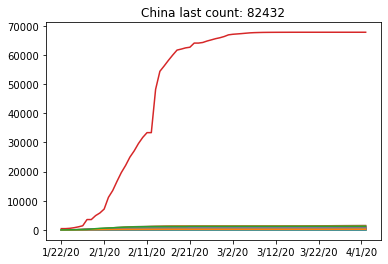

In [7]:
for a in ['China']:
    plot_country(a)

In [10]:
def get_cleaned(country):
    df = raw[raw['Country/Region'] == country]
    df = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).T

    mapping = {}
    mapping[list(df.columns)[0]] = "Total Cases"

    df = df.rename(columns=mapping)
    diff = []
    acc = 0
    for index, row in df.iterrows():
        curr = row.iloc[0]
        diff.append(curr - acc)
        acc = curr
    df["New Cases"] = diff
    return df

In [11]:
us = get_cleaned('US')
us

,Total Cases,New Cases
1/22/20,1,1
1/23/20,1,0
1/24/20,2,1
1/25/20,2,0
1/26/20,5,3
1/27/20,5,0
1/28/20,5,0
1/29/20,5,0
1/30/20,5,0
1/31/20,7,2


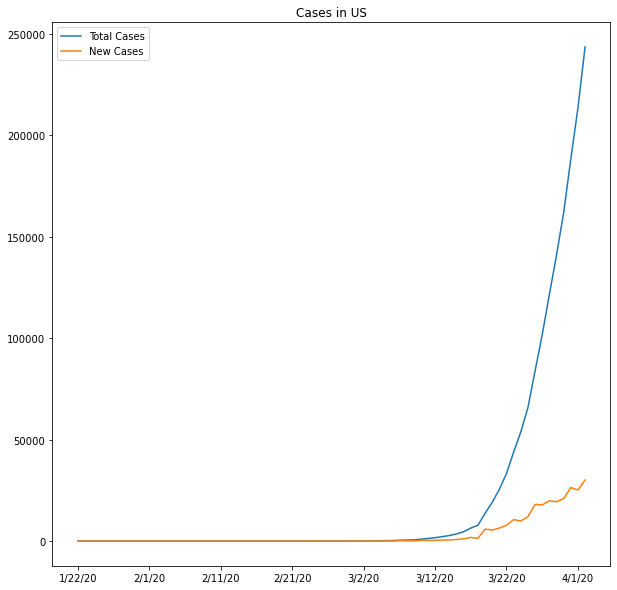

In [41]:
us.plot(figsize=(10,10), title='Cases in US')

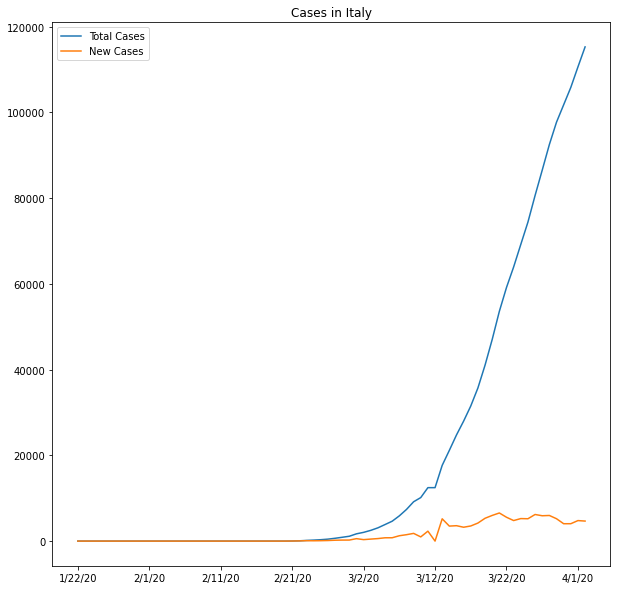

In [42]:
italy = get_cleaned('Italy')
italy.plot(figsize=(10,10), title='Cases in Italy')

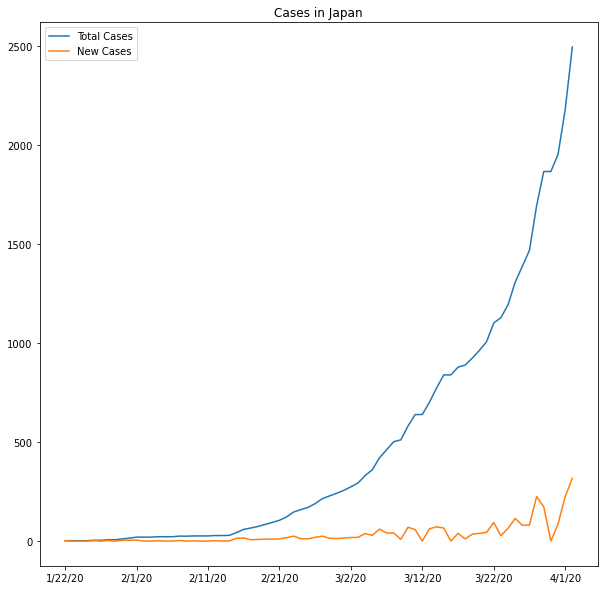

In [43]:
get_cleaned('Japan').plot(figsize=(10,10), title='Cases in Japan')

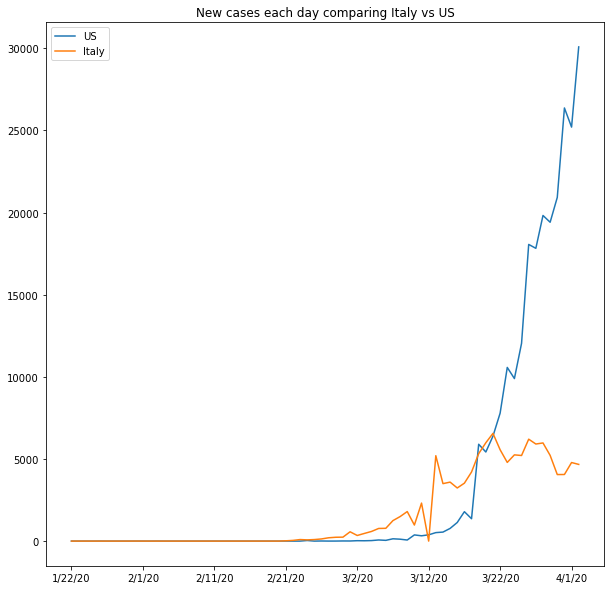

In [44]:
ndf = pd.DataFrame(data={
    "US": us['New Cases'], 
    'Italy': italy['New Cases']
})
ndf.plot(figsize=(10,10), title="New cases each day comparing Italy vs US")